Years from  2010  to  2018
Filter by Points or Championships(type p or c): c
How many teams from the top: 5
count     30.000000
mean      77.916667
std       78.195801
min        0.000000
20%       18.750000
40%       37.500000
50%       46.875000
60%       52.500000
80%      140.000000
max      312.500000
Name: Playoff Points, dtype: float64
               Playoff Points  Champion  Finalist  Conf Finals  \
San Francisco          312.50         3         0            0   
Boston                 225.00         2         0            0   
St. Louis              212.50         1         1            2   
Cubs                   156.25         1         0            2   
Kansas City            150.00         1         1            0   

               2nd Round Exit  1st Round Exit  Qualifier%  Apperences  \
San Francisco               1               0           0           0   
Boston                      2               0           0           0   
St. Louis                   1          

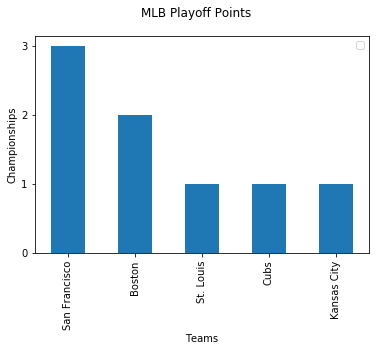

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets

#Reads CSV file for given league
fTable = pd.read_csv('MLB.csv',sep=',')

#Asks user for a range of seasons
yearStart = 2010#input("From: ")
yearEnd = 2018#input("To: ")
print("Years from ",yearStart," to ",yearEnd)

#Asks user the parameter to filter by
parameter = input("Filter by Points or Championships(type p or c): ")
maxTeams = int(input("How many teams from the top: "))

#Variables for index of starting year and ending year of the range of Seasons- Potiential issues: Lockout years should not be counted therefore using the subtraction of years is subject to problems
sIndex = fTable[fTable['Season'] == int(yearEnd)].index.item()
eIndex = sIndex + (int(yearEnd) - int(yearStart) + 1)
sRange = fTable[sIndex:eIndex]

#Variables for the Point values of each category
scP = 100
ruP = 50
confP = 25
divP = 12.5
firP = 6.25

#Get List of Teams for this Range
teams = fTable.iloc[sIndex,12]
names = teams.split(',')

#Creates DataFrame table from given list of teams and setup column headers
pTable = pd.DataFrame(0,index = names,columns = ['Playoff Points', 'Champion','Finalist','Conf Finals','2nd Round Exit', '1st Round Exit','Qualifier%','Apperences','Active Years'])

#Iterates over range of seasons and adds values to table for each team
#World Series
scN = sRange['World Series'].value_counts().keys().tolist() #Names of Teams
scV = sRange['World Series'].value_counts().tolist() #Freq count 
for x in range(len(scN)):                           #Loop through and update the count on the points table
    pTable.at[scN[x],'Champion'] = scV[x]

#Finalists
ruN = sRange['Runner-up'].value_counts().keys().tolist()
ruV = sRange['Runner-up'].value_counts().tolist()
for x in range(len(ruN)):
    pTable.at[ruN[x],'Finalist'] = ruV[x]

#Conf Finalists
    #Eastern Conf
ecN = sRange['NLCS'].value_counts().keys().tolist()
ecV = sRange['NLCS'].value_counts().tolist()
for x in range(len(ecN)):
    pTable.at[ecN[x],'Conf Finals'] = ecV[x]
    #Western Conf 
wcN = sRange['ALCS'].value_counts().keys().tolist()
wcV = sRange['ALCS'].value_counts().tolist()
for x in range(len(wcN)):
    pTable.at[wcN[x],'Conf Finals'] = wcV[x]

#2nd Round
divGroup = sRange[['NLDS1','NLDS2','ALDS1','ALDS2']] #Make sub-dataframe
divN = divGroup.melt()['value'].value_counts().keys().tolist()#melt function allows us to count across the whole sub-dataframe
divV = divGroup.melt()['value'].value_counts().tolist()
for x in range(len(divN)):
    pTable.at[divN[x],'2nd Round Exit'] = divV[x]
    
#1st Round
firGroup = sRange[['NLWC','ALWC']]
firN = firGroup.melt()['value'].value_counts().keys().tolist()
firV = firGroup.melt()['value'].value_counts().tolist()
for x in range(len(firN)):
    pTable.at[firN[x],'1st Round Exit'] = firV[x]
    
#Formula taking the given point values from the variables and summing up the total points for each team
pTable['Playoff Points'] = pTable['Champion']*scP + pTable['Finalist']*ruP+ pTable['Conf Finals']*confP + pTable['2nd Round Exit']*divP+pTable['1st Round Exit']*firP


points = pTable['Playoff Points']

if (parameter == 'p'):
    pTable = pTable.sort_values(by=['Playoff Points','Champion','Finalist','Conf Finals','2nd Round Exit','1st Round Exit'],ascending = False)
    pTable = pTable.head(maxTeams)
    pTable.reset_index().plot(kind='bar',x='index',y='Playoff Points')
    plt.suptitle('MLB Playoff Points')
    plt.xlabel('Teams')
    plt.ylabel('Points')
    plt.legend('')
    

elif (parameter == 'c'):
    pTable = pTable.sort_values(by=['Champion','Playoff Points','Finalist','Conf Finals','2nd Round Exit','1st Round Exit'],ascending = False)
    pTable = pTable.head(maxTeams)
    pTable.reset_index().plot(kind='bar',x='index',y='Champion')
    plt.suptitle('MLB Championships')
    plt.xlabel('Teams')
    plt.ylabel('Championships')
    plt.yticks(np.arange(0,max(pTable['Champion']+1),1))
    plt.legend('')



perc = [.20,.40,.60,.80]
include = ['object','float','int']
print(points.describe(percentiles = perc, include = include))



#Unique Instances
# uniqSC = pTable['Super Bowls'].value_counts()
# del uniqSC[0]
# uniqSC = sum(uniqSC)
# print('Unique Cups Winners: ',uniqSC)

# uniqRU = pTable['Finalist'].value_counts()
# del uniqRU[0]
# uniqRU = sum(uniqRU)
# print('Unique Finalists: ',uniqRU)

# uniqConf = pTable['Conf Finals'].value_counts()
# del uniqConf[0]
# uniqConf = sum(uniqConf)
# print('Unique Conf Finalists: ',uniqConf)

# uniqDiv = pTable['2nd Round Exit'].value_counts()
# del uniqDiv[0]
# uniqDiv = sum(uniqDiv)
# print('Unique Divisional Finalists: ',uniqDiv)

# uniqFir = pTable['1st Round Exit'].value_counts()
# del uniqFir[0]
# uniqFir = sum(uniqFir)
# print('Unique Cups 1st Round Exits: ',uniqFir)

# uniqDQ = pTable.loc[pTable['Playoff Points']==0]
# if uniqDQ.empty:
#     print('Unique Non-Qualifiers: 0')
# else:
#     print('Unique Non-Qualifiers: ', uniqDQ.shape[0])
   
    
#Finding parity 

labels = ["Group1","Group2","Group3","Group4","Group5"]
#print(sum(points))

print(pTable)
